Forward pass output shape: torch.Size([1, 3, 224, 224])


Reconstructed input shape: torch.Size([1, 3, 224, 224])


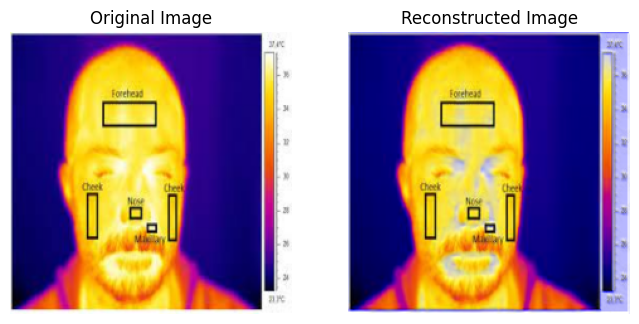

Mean Squared Error (MSE): 0.007150646764785051
Peak Signal-to-Noise Ratio (PSNR): 21.456546783447266


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

class CouplingLayer(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(CouplingLayer, self).__init__()

        # Split the input into two parts
        self.split = in_channels // 2

        # Create sub-networks for each part
        self.scale = nn.Sequential(
            nn.Conv2d(self.split, hidden_channels, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_channels, self.split, kernel_size=3, padding=1),
            nn.Tanh()
        )

        self.translation = nn.Sequential(
            nn.Conv2d(self.split, hidden_channels, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_channels, self.split, kernel_size=3, padding=1)
        )

    def forward(self, x, reverse=False):
        x1, x2 = torch.chunk(x, 2, dim=1)

        if not reverse:
            y1 = x1 * torch.exp(self.scale(x2)) + self.translation(x2)
        else:
            y1 = (x1 - self.translation(x2)) * torch.exp(-self.scale(x2))

        return torch.cat([y1, x2], dim=1)

class InvertibleCNN(nn.Module):
    def __init__(self, num_coupling_layers, in_channels, hidden_channels):
        super(InvertibleCNN, self).__init__()

        self.layers = nn.ModuleList([
            CouplingLayer(in_channels, hidden_channels) for _ in range(num_coupling_layers)
        ])

    def forward(self, x, reverse=False):
        for layer in self.layers:
            x = layer(x, reverse)
        return x

# Example usage with a single image
num_coupling_layers = 8
in_channels = 3  # Assuming RGB images
hidden_channels = 64

inn = InvertibleCNN(num_coupling_layers, in_channels, hidden_channels)

# Load image data using PIL
image_path = '/content/math1.jpeg'
image = Image.open(image_path).convert('RGB')

# Transform the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

image = transform(image).unsqueeze(0)  # Add batch dimension

# Forward pass
outputs = inn(image)
print("Forward pass output shape:", outputs.shape)

# Reverse pass
reconstructed_inputs = inn(outputs, reverse=True)
print("Reconstructed input shape:", reconstructed_inputs.shape)

# Convert torch tensors to numpy arrays
original_image = image[0].permute(1, 2, 0).numpy()
reconstructed_image = reconstructed_inputs[0].permute(1, 2, 0).detach().numpy()

# Display the images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image)
plt.axis("off")

plt.show()
import torch.nn.functional as F

# Compute Mean Squared Error (MSE)
mse = F.mse_loss(image, reconstructed_inputs)
print("Mean Squared Error (MSE):", mse.item())

# Compute Peak Signal-to-Noise Ratio (PSNR)
max_pixel = 1.0  # Assuming pixel values are normalized between 0 and 1
psnr = 20 * torch.log10(max_pixel / torch.sqrt(mse))
print("Peak Signal-to-Noise Ratio (PSNR):", psnr.item())


Forward pass output shape: torch.Size([1, 3, 224, 224])


Reconstructed input shape: torch.Size([1, 3, 224, 224])


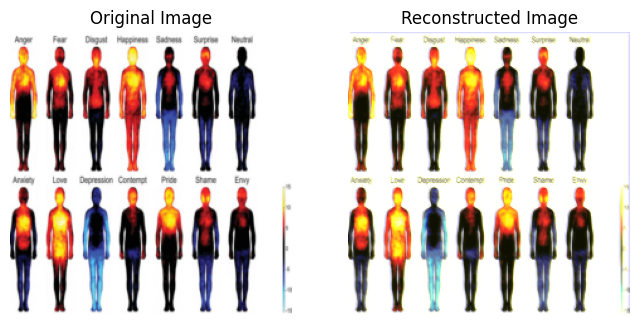

Mean Squared Error (MSE): 0.02215663716197014
Peak Signal-to-Noise Ratio (PSNR): 16.54496192932129


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

class CouplingLayer(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(CouplingLayer, self).__init__()

        # Split the input into two parts
        self.split = in_channels // 2

        # Create sub-networks for each part
        self.scale = nn.Sequential(
            nn.Conv2d(self.split, hidden_channels, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_channels, self.split, kernel_size=3, padding=1),
            nn.Tanh()
        )

        self.translation = nn.Sequential(
            nn.Conv2d(self.split, hidden_channels, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_channels, self.split, kernel_size=3, padding=1)
        )

    def forward(self, x, reverse=False):
        x1, x2 = torch.chunk(x, 2, dim=1)

        if not reverse:
            y1 = x1 * torch.exp(self.scale(x2)) + self.translation(x2)
        else:
            y1 = (x1 - self.translation(x2)) * torch.exp(-self.scale(x2))

        return torch.cat([y1, x2], dim=1)

class InvertibleCNN(nn.Module):
    def __init__(self, num_coupling_layers, in_channels, hidden_channels):
        super(InvertibleCNN, self).__init__()

        self.layers = nn.ModuleList([
            CouplingLayer(in_channels, hidden_channels) for _ in range(num_coupling_layers)
        ])

    def forward(self, x, reverse=False):
        for layer in self.layers:
            x = layer(x, reverse)
        return x

# Example usage with a single image
num_coupling_layers = 8
in_channels = 3  # Assuming RGB images
hidden_channels = 64

inn = InvertibleCNN(num_coupling_layers, in_channels, hidden_channels)

inn = InvertibleCNN(num_coupling_layers, in_channels, hidden_channels)

inn = InvertibleCNN(num_coupling_layers, in_channels, hidden_channels)

# Load image data using PIL
image_path = '/content/maths.jpg'
image = Image.open(image_path).convert('RGB')

# Transform the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

image = transform(image).unsqueeze(0)  # Add batch dimension

# Forward pass
outputs = inn(image)
print("Forward pass output shape:", outputs.shape)

# Reverse pass
reconstructed_inputs = inn(outputs, reverse=True)
print("Reconstructed input shape:", reconstructed_inputs.shape)

# Convert torch tensors to numpy arrays
original_image = image[0].permute(1, 2, 0).numpy()
reconstructed_image = reconstructed_inputs[0].permute(1, 2, 0).detach().numpy()

# Display the images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image)
plt.axis("off")

plt.show()

import torch.nn.functional as F

# Compute Mean Squared Error (MSE)
mse = F.mse_loss(image, reconstructed_inputs)
print("Mean Squared Error (MSE):", mse.item())

# Compute Peak Signal-to-Noise Ratio (PSNR)
max_pixel = 1.0  # Assuming pixel values are normalized between 0 and 1
psnr = 20 * torch.log10(max_pixel / torch.sqrt(mse))
print("Peak Signal-to-Noise Ratio (PSNR):", psnr.item())


Forward pass output shape: torch.Size([1, 3, 224, 224])


Reconstructed input shape: torch.Size([1, 3, 224, 224])


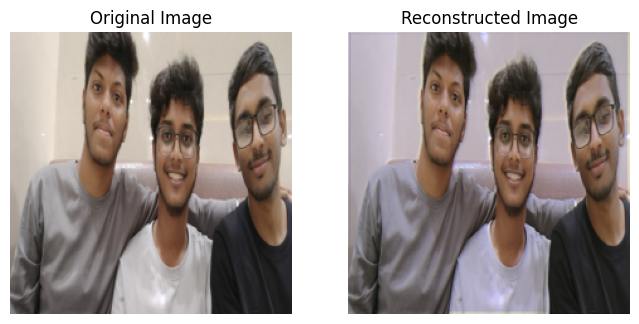

Mean Squared Error (MSE): 0.0019118096679449081
Peak Signal-to-Noise Ratio (PSNR): 27.1855525970459


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

class CouplingLayer(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(CouplingLayer, self).__init__()

        # Split the input into two parts
        self.split = in_channels // 2

        # Create sub-networks for each part
        self.scale = nn.Sequential(
            nn.Conv2d(self.split, hidden_channels, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_channels, self.split, kernel_size=3, padding=1),
            nn.Tanh()
        )

        self.translation = nn.Sequential(
            nn.Conv2d(self.split, hidden_channels, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_channels, self.split, kernel_size=3, padding=1)
        )

    def forward(self, x, reverse=False):
        x1, x2 = torch.chunk(x, 2, dim=1)

        if not reverse:
            y1 = x1 * torch.exp(self.scale(x2)) + self.translation(x2)
        else:
            y1 = (x1 - self.translation(x2)) * torch.exp(-self.scale(x2))

        return torch.cat([y1, x2], dim=1)

class InvertibleCNN(nn.Module):
    def __init__(self, num_coupling_layers, in_channels, hidden_channels):
        super(InvertibleCNN, self).__init__()

        self.layers = nn.ModuleList([
            CouplingLayer(in_channels, hidden_channels) for _ in range(num_coupling_layers)
        ])

    def forward(self, x, reverse=False):
        for layer in self.layers:
            x = layer(x, reverse)
        return x

# Example usage with a single image
num_coupling_layers = 5
in_channels = 3  # Assuming RGB images
hidden_channels = 64

inn = InvertibleCNN(num_coupling_layers, in_channels, hidden_channels)

# Load image data using PIL
image_path = '/content/IMG20230730100243.jpg'
image = Image.open(image_path).convert('RGB')

# Transform the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

image = transform(image).unsqueeze(0)  # Add batch dimension

# Forward pass
outputs = inn(image)
print("Forward pass output shape:", outputs.shape)

# Reverse pass
reconstructed_inputs = inn(outputs, reverse=True)
print("Reconstructed input shape:", reconstructed_inputs.shape)

# Convert torch tensors to numpy arrays
original_image = image[0].permute(1, 2, 0).numpy()
reconstructed_image = reconstructed_inputs[0].permute(1, 2, 0).detach().numpy()

# Display the images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image)
plt.axis("off")

plt.show()

import torch.nn.functional as F

# Compute Mean Squared Error (MSE)
mse = F.mse_loss(image, reconstructed_inputs)
print("Mean Squared Error (MSE):", mse.item())

# Compute Peak Signal-to-Noise Ratio (PSNR)
max_pixel = 1.0  # Assuming pixel values are normalized between 0 and 1
psnr = 20 * torch.log10(max_pixel / torch.sqrt(mse))
print("Peak Signal-to-Noise Ratio (PSNR):", psnr.item())


Forward pass output shape: torch.Size([1, 3, 224, 224])


Reconstructed input shape: torch.Size([1, 3, 224, 224])


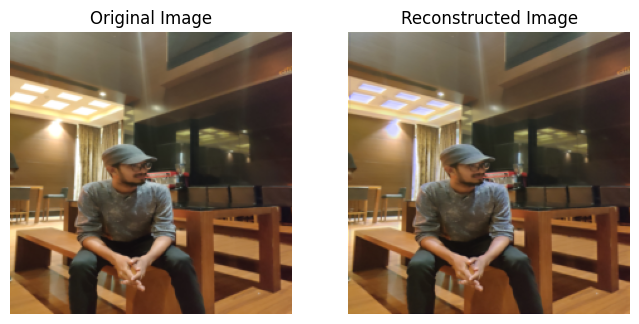

Mean Squared Error (MSE): 0.00044688122579827905
Peak Signal-to-Noise Ratio (PSNR): 33.49808120727539


In [11]:
# Load image data using PIL
image_path = '/content/IMG20230730135440.jpg'
image = Image.open(image_path).convert('RGB')

# Transform the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

image = transform(image).unsqueeze(0)  # Add batch dimension

# Forward pass
outputs = inn(image)
print("Forward pass output shape:", outputs.shape)

# Reverse pass
reconstructed_inputs = inn(outputs, reverse=True)
print("Reconstructed input shape:", reconstructed_inputs.shape)

# Convert torch tensors to numpy arrays
original_image = image[0].permute(1, 2, 0).numpy()
reconstructed_image = reconstructed_inputs[0].permute(1, 2, 0).detach().numpy()

# Display the images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image)
plt.axis("off")

plt.show()

import torch.nn.functional as F

# Compute Mean Squared Error (MSE)
mse = F.mse_loss(image, reconstructed_inputs)
print("Mean Squared Error (MSE):", mse.item())

# Compute Peak Signal-to-Noise Ratio (PSNR)
max_pixel = 1.0  # Assuming pixel values are normalized between 0 and 1
psnr = 20 * torch.log10(max_pixel / torch.sqrt(mse))
print("Peak Signal-to-Noise Ratio (PSNR):", psnr.item())


Forward pass output shape: torch.Size([1, 3, 224, 224])


Reconstructed input shape: torch.Size([1, 3, 224, 224])


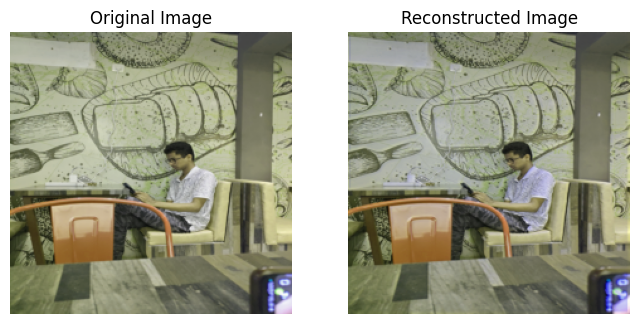

Mean Squared Error (MSE): 0.0008849445730447769
Peak Signal-to-Noise Ratio (PSNR): 30.530838012695312


In [13]:


# Load image data using PIL
image_path = '/content/IMG20230730163805.jpg'
image = Image.open(image_path).convert('RGB')

# Transform the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    #transforms.Resize((1080, 1920)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.RandomRotation(degrees=0),
    transforms.RandomHorizontalFlip(p=0.1),
    transforms.ToTensor()
])

image = transform(image).unsqueeze(0)  # Add batch dimension

# Forward pass
outputs = inn(image)
print("Forward pass output shape:", outputs.shape)

# Reverse pass
reconstructed_inputs = inn(outputs, reverse=True)
print("Reconstructed input shape:", reconstructed_inputs.shape)

# Convert torch tensors to numpy arrays
original_image = image[0].permute(1, 2, 0).numpy()
reconstructed_image = reconstructed_inputs[0].permute(1, 2, 0).detach().numpy()

# Display the images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image)
plt.axis("off")

plt.show()

import torch.nn.functional as F

# Compute Mean Squared Error (MSE)
mse = F.mse_loss(image, reconstructed_inputs)
print("Mean Squared Error (MSE):", mse.item())

# Compute Peak Signal-to-Noise Ratio (PSNR)
max_pixel = 1.0  # Assuming pixel values are normalized between 0 and 1
psnr = 20 * torch.log10(max_pixel / torch.sqrt(mse))
print("Peak Signal-to-Noise Ratio (PSNR):", psnr.item())



Forward pass output shape: torch.Size([1, 3, 224, 224])
Reconstructed input shape: torch.Size([1, 3, 224, 224])


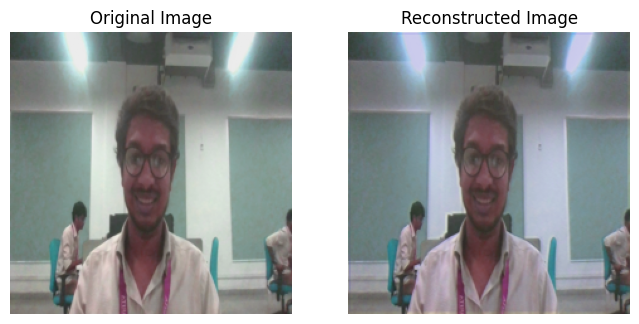

Mean Squared Error (MSE): 0.0018473764648661017
Peak Signal-to-Noise Ratio (PSNR): 27.33444595336914


In [14]:

# Load image data using PIL
image_path = '/content/WIN_20240314_13_45_14_Pro.jpg'
image = Image.open(image_path).convert('RGB')

# Transform the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.RandomRotation(degrees=0),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

image = transform(image).unsqueeze(0)  # Add batch dimension

# Forward pass
outputs = inn(image)
print("Forward pass output shape:", outputs.shape)

# Reverse pass
reconstructed_inputs = inn(outputs, reverse=True)
print("Reconstructed input shape:", reconstructed_inputs.shape)

# Convert torch tensors to numpy arrays
original_image = image[0].permute(1, 2, 0).numpy()
reconstructed_image = reconstructed_inputs[0].permute(1, 2, 0).detach().numpy()

# Display the images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image)
plt.axis("off")

plt.show()
# Compute Mean Squared Error (MSE)
mse = F.mse_loss(image, reconstructed_inputs)
print("Mean Squared Error (MSE):", mse.item())

# Compute Peak Signal-to-Noise Ratio (PSNR)
max_pixel = 1.0  # Assuming pixel values are normalized between 0 and 1
psnr = 20 * torch.log10(max_pixel / torch.sqrt(mse))
print("Peak Signal-to-Noise Ratio (PSNR):", psnr.item())



Forward pass output shape: torch.Size([1, 3, 224, 224])
Reconstructed input shape: torch.Size([1, 3, 224, 224])


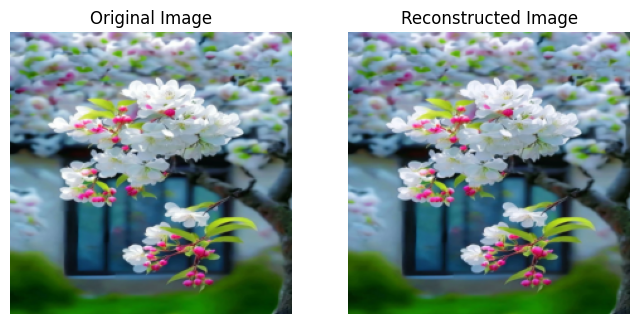

Mean Squared Error (MSE): 9.2634632892441e-05
Peak Signal-to-Noise Ratio (PSNR): 40.3322639465332


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

class CouplingLayer(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(CouplingLayer, self).__init__()

        # Split the input into two parts
        self.split = in_channels // 2

        # Create sub-networks for each part
        self.scale = nn.Sequential(
            nn.Conv2d(self.split, hidden_channels, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_channels, self.split, kernel_size=3, padding=1),
            nn.Tanh()
        )

        self.translation = nn.Sequential(
            nn.Conv2d(self.split, hidden_channels, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_channels, self.split, kernel_size=3, padding=1)
        )

    def forward(self, x, reverse=False):
        x1, x2 = torch.chunk(x, 2, dim=1)

        if not reverse:
            y1 = x1 * torch.exp(self.scale(x2)) + self.translation(x2)
        else:
            y1 = (x1 - self.translation(x2)) * torch.exp(-self.scale(x2))

        return torch.cat([y1, x2], dim=1)

class InvertibleCNN(nn.Module):
    def __init__(self, num_coupling_layers, in_channels, hidden_channels):
        super(InvertibleCNN, self).__init__()

        self.layers = nn.ModuleList([
            CouplingLayer(in_channels, hidden_channels) for _ in range(num_coupling_layers)
        ])

    def forward(self, x, reverse=False):
        for layer in self.layers:
            x = layer(x, reverse)
        return x

# Example usage with a single image
num_coupling_layers = 2
in_channels = 3  # Assuming RGB images
hidden_channels = 64

inn = InvertibleCNN(num_coupling_layers, in_channels, hidden_channels)

# Load image data using PIL
image_path = '/content/676953b1bcfc999f54610cf94f333e19.jpg'
image = Image.open(image_path).convert('RGB')

# Transform the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

image = transform(image).unsqueeze(0)  # Add batch dimension

# Forward pass
outputs = inn(image)
print("Forward pass output shape:", outputs.shape)

# Reverse pass
reconstructed_inputs = inn(outputs, reverse=True)
print("Reconstructed input shape:", reconstructed_inputs.shape)

# Convert torch tensors to numpy arrays
original_image = image[0].permute(1, 2, 0).numpy()
reconstructed_image = reconstructed_inputs[0].permute(1, 2, 0).detach().numpy()

# Display the images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image)
plt.axis("off")

plt.show()

import torch.nn.functional as F

# Compute Mean Squared Error (MSE)
mse = F.mse_loss(image, reconstructed_inputs)
print("Mean Squared Error (MSE):", mse.item())

# Compute Peak Signal-to-Noise Ratio (PSNR)
max_pixel = 1.0  # Assuming pixel values are normalized between 0 and 1
psnr = 20 * torch.log10(max_pixel / torch.sqrt(mse))
print("Peak Signal-to-Noise Ratio (PSNR):", psnr.item())


Forward pass output shape: torch.Size([1, 3, 224, 224])
Reconstructed input shape: torch.Size([1, 3, 224, 224])


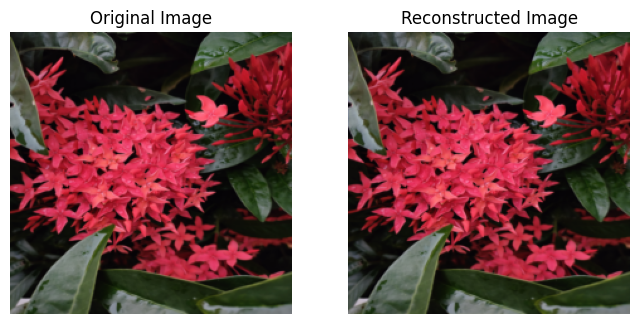

Mean Squared Error (MSE): 1.3863845197192859e-05
Peak Signal-to-Noise Ratio (PSNR): 48.58116149902344


In [16]:

# Example usage with a single image
num_coupling_layers = 3
in_channels = 3  # Assuming RGB images
hidden_channels = 64

inn = InvertibleCNN(num_coupling_layers, in_channels, hidden_channels)
image_path = '/content/IMG_20221123_151728.jpg'
image = Image.open(image_path).convert('RGB')

# Transform the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

image = transform(image).unsqueeze(0)  # Add batch dimension

# Forward pass
outputs = inn(image)
print("Forward pass output shape:", outputs.shape)

# Reverse pass
reconstructed_inputs = inn(outputs, reverse=True)
print("Reconstructed input shape:", reconstructed_inputs.shape)

# Convert torch tensors to numpy arrays
original_image = image[0].permute(1, 2, 0).numpy()
reconstructed_image = reconstructed_inputs[0].permute(1, 2, 0).detach().numpy()

# Display the images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image)
plt.axis("off")

plt.show()

import torch.nn.functional as F

# Compute Mean Squared Error (MSE)
mse = F.mse_loss(image, reconstructed_inputs)
print("Mean Squared Error (MSE):", mse.item())

# Compute Peak Signal-to-Noise Ratio (PSNR)
max_pixel = 1.0  # Assuming pixel values are normalized between 0 and 1
psnr = 20 * torch.log10(max_pixel / torch.sqrt(mse))
print("Peak Signal-to-Noise Ratio (PSNR):", psnr.item())


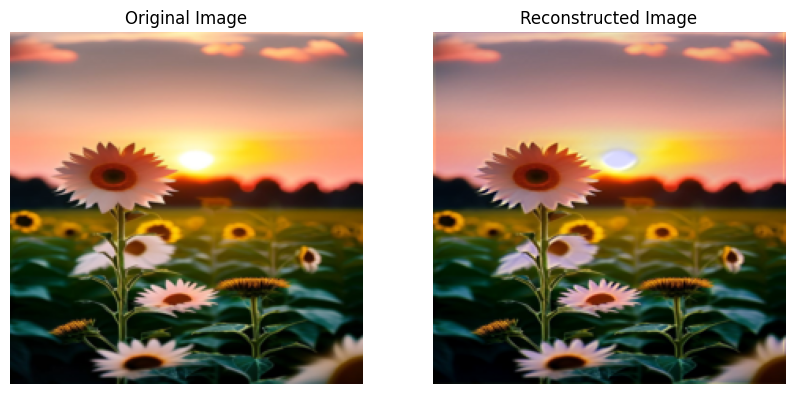

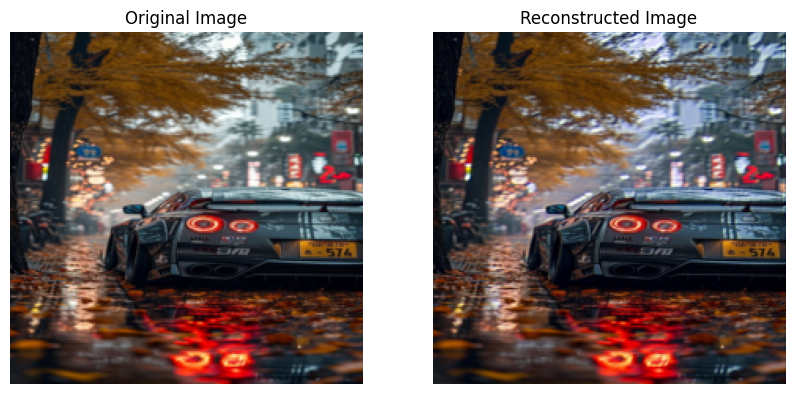

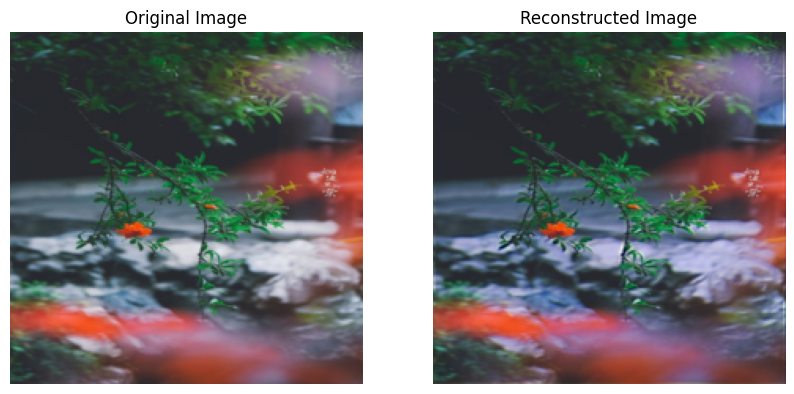

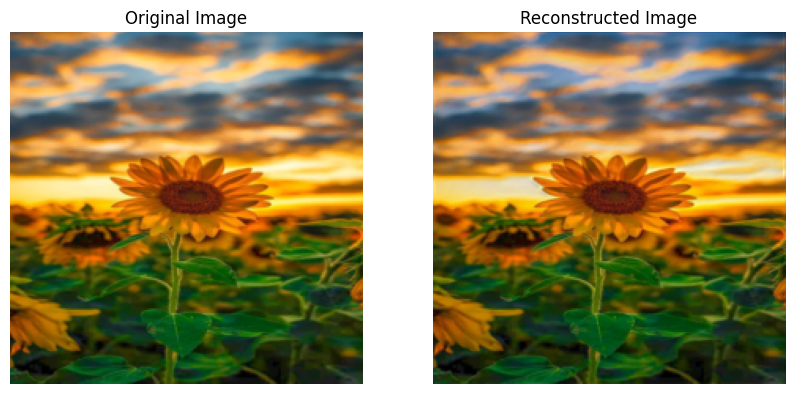

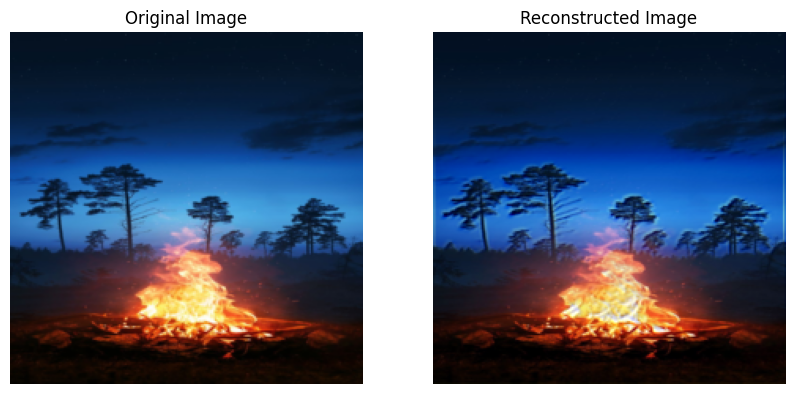

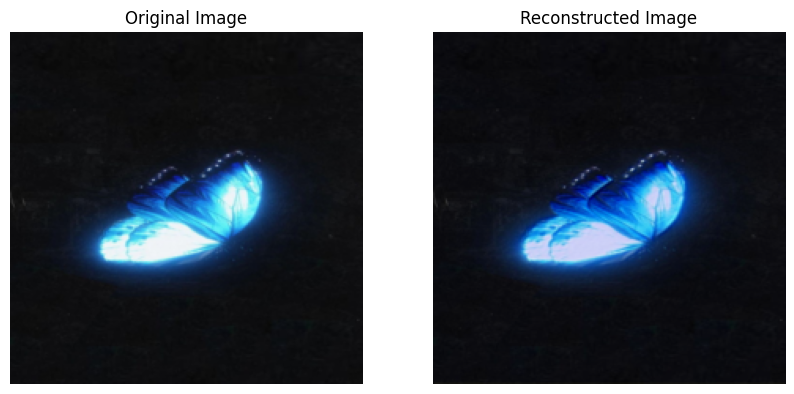

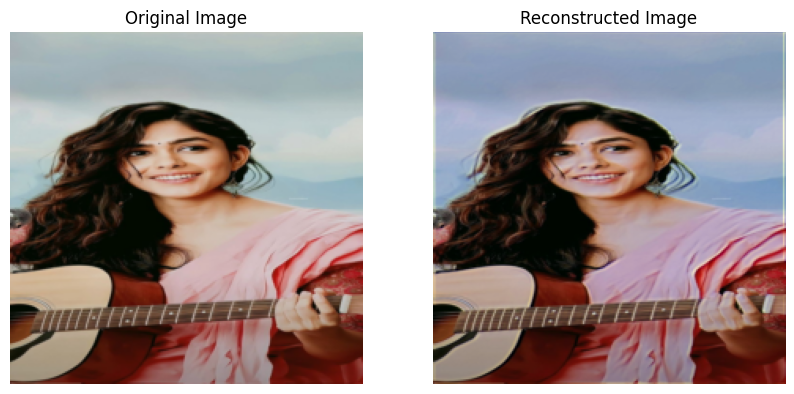

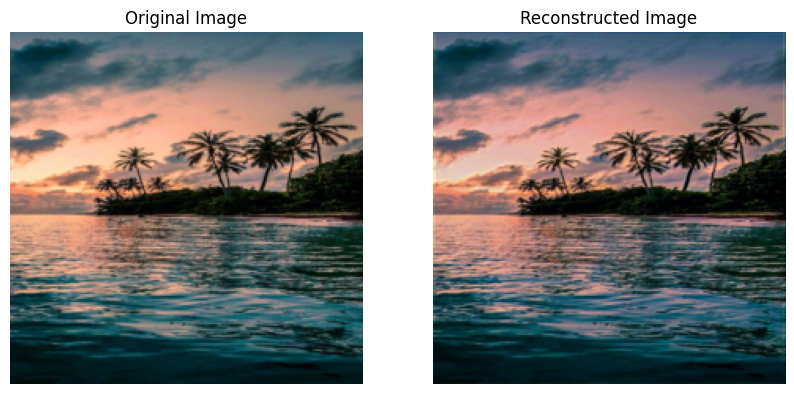

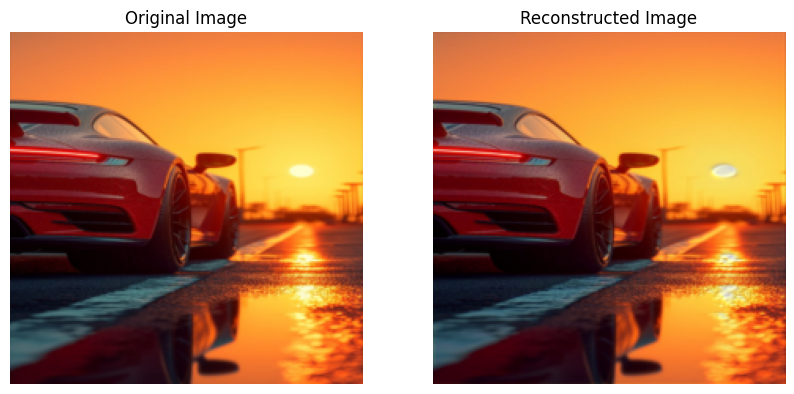

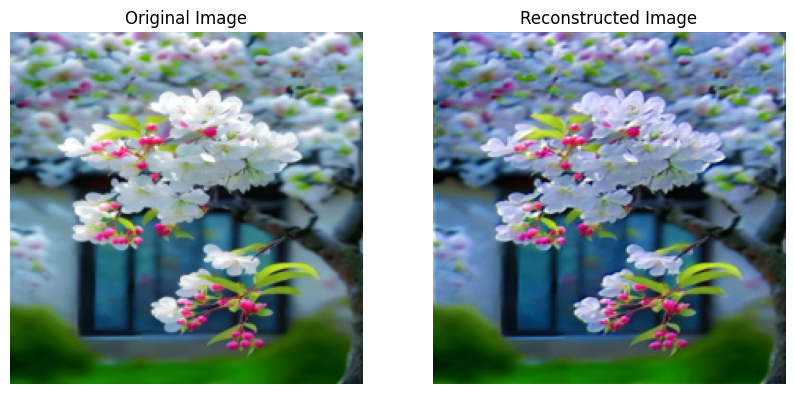

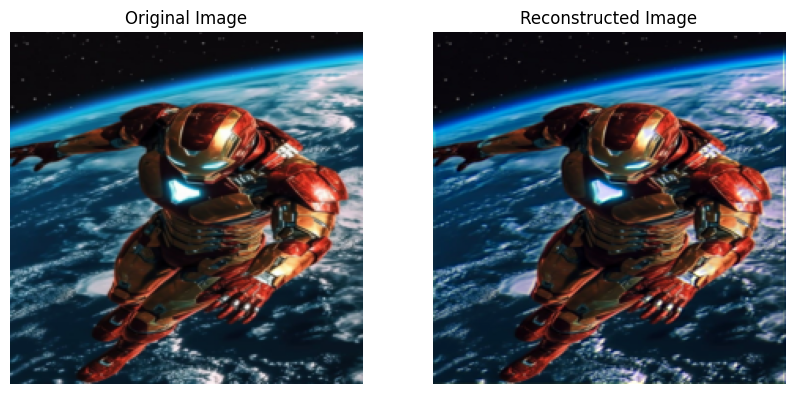

Reconstruction and plotting completed for all images in the folder.


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

class CouplingLayer(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(CouplingLayer, self).__init__()

        # Split the input into two parts
        self.split = in_channels // 2

        # Create sub-networks for each part
        self.scale = nn.Sequential(
            nn.Conv2d(self.split, hidden_channels, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_channels, self.split, kernel_size=3, padding=1),
            nn.Tanh()
        )

        self.translation = nn.Sequential(
            nn.Conv2d(self.split, hidden_channels, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_channels, self.split, kernel_size=3, padding=1)
        )

    def forward(self, x, reverse=False):
        x1, x2 = torch.chunk(x, 2, dim=1)

        if not reverse:
            y1 = x1 * torch.exp(self.scale(x2)) + self.translation(x2)
        else:
            y1 = (x1 - self.translation(x2)) * torch.exp(-self.scale(x2))

        return torch.cat([y1, x2], dim=1)

class InvertibleCNN(nn.Module):
    def __init__(self, num_coupling_layers, in_channels, hidden_channels):
        super(InvertibleCNN, self).__init__()

        self.layers = nn.ModuleList([
            CouplingLayer(in_channels, hidden_channels) for _ in range(num_coupling_layers)
        ])

    def forward(self, x, reverse=False):
        for layer in self.layers:
            x = layer(x, reverse)
        return x

# Example usage with a single image
num_coupling_layers = 6
in_channels = 3  # Assuming RGB images
hidden_channels = 64

inn = InvertibleCNN(num_coupling_layers, in_channels, hidden_channels)

# Define image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Directory containing images to reconstruct
input_folder = '/content/imges/input'
output_folder = '/content/imges/output'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through images in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load image
        image_path = os.path.join(input_folder, filename)
        image = Image.open(image_path).convert('RGB')

        # Transform the image
        image = transform(image).unsqueeze(0)  # Add batch dimension

        # Forward pass
        outputs = inn(image)

        # Reverse pass
        reconstructed_inputs = inn(outputs, reverse=True)

        # Convert torch tensor to numpy array
        original_image = image[0].permute(1, 2, 0).numpy()
        reconstructed_image = reconstructed_inputs[0].permute(1, 2, 0).detach().numpy()

        # Plot original and reconstructed images side by side
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title("Original Image")
        plt.imshow(original_image)
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.title("Reconstructed Image")
        plt.imshow(reconstructed_image)
        plt.axis("off")

        plt.show()

print("Reconstruction and plotting completed for all images in the folder.")
